# Model Training

Train Logistic Regression, Random Forest, and XGBoost models, handling class imbalance with SMOTE.

In [16]:
import sys
import os

# go one level up (from Notebook/ to project root)
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "..")))

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from joblib import dump
from src.config import PROCESSED_DATA_PATH, MODEL_DIR, TEST_SIZE, RANDOM_STATE, SMOTE_RANDOM_STATE
from src.utils import log_info

# Load engineered data
data = pd.read_csv(PROCESSED_DATA_PATH.replace('.csv', '_engineered.csv'))
X = data.drop('Loan_Status', axis=1)
y = data['Loan_Status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE, random_state=RANDOM_STATE)
log_info(f'Data split: X_train shape {X_train.shape}, X_test shape {X_test.shape}')

2025-09-11 08:49:47,400 - INFO - Data split: X_train shape (491, 15), X_test shape (123, 15)


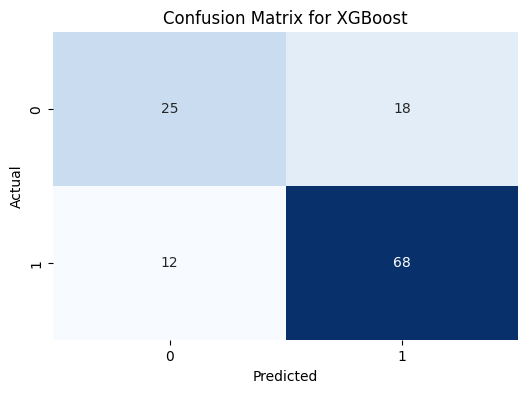

{'Accuracy': 0.7560975609756098,
 'Precision': 0.7906976744186046,
 'Recall': 0.85,
 'F1 Score': 0.8192771084337349}

In [17]:
# Evaluate metrics function
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None
    metrics = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred),
    }
    return metrics
# Confusion matrix plotting function
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(y_test, y_pred, model_name):
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Showing results function without def
plot_confusion_matrix(y_test, XGBClassifier().fit(X_train, y_train).predict(X_test), 'XGBoost')  # Example usage
evaluate_model(XGBClassifier().fit(X_train, y_train), X_test, y_test)  # Example usage

In [18]:
# Handle class imbalance with SMOTE
smote = SMOTE(random_state=SMOTE_RANDOM_STATE)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
log_info(f'SMOTE applied: X_train_smote shape {X_train_smote.shape}')

2025-09-11 08:49:47,935 - INFO - SMOTE applied: X_train_smote shape (684, 15)


In [19]:
# Train models
log_model = LogisticRegression(random_state=RANDOM_STATE)
rf_model = RandomForestClassifier(random_state=RANDOM_STATE)
xgb_model = XGBClassifier(random_state=RANDOM_STATE, eval_metric='logloss')

log_model.fit(X_train_smote, y_train_smote)
rf_model.fit(X_train_smote, y_train_smote)
xgb_model.fit(X_train_smote, y_train_smote)

log_info('Models trained: LogisticRegression, RandomForest, XGBoost')



c:\Users\anxaa\OneDrive\Documents\Github Project\AI-Powered-Loan-Approval-Classifier-main\AI-Powered-Loan-Approval-Classifier-main\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
2025-09-11 08:49:48,525 - INFO - Models trained: LogisticRegression, RandomForest, XGBoost


2025-09-11 08:49:48,575 - INFO - Logistic Regression evaluation metrics: {'Accuracy': 0.7479674796747967, 'Precision': 0.7692307692307693, 'Recall': 0.875, 'F1 Score': 0.8187134502923976}


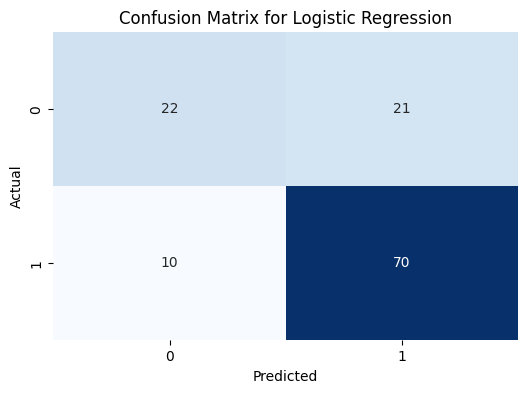

2025-09-11 08:49:48,780 - INFO - Random Forest evaluation metrics: {'Accuracy': 0.7967479674796748, 'Precision': 0.8021978021978022, 'Recall': 0.9125, 'F1 Score': 0.8538011695906432}


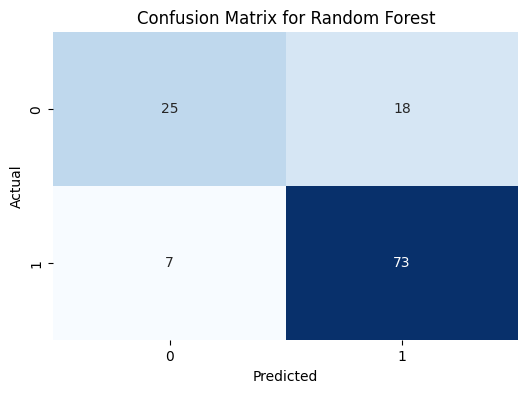

2025-09-11 08:49:48,954 - INFO - XGBoost evaluation metrics: {'Accuracy': 0.7560975609756098, 'Precision': 0.7906976744186046, 'Recall': 0.85, 'F1 Score': 0.8192771084337349}


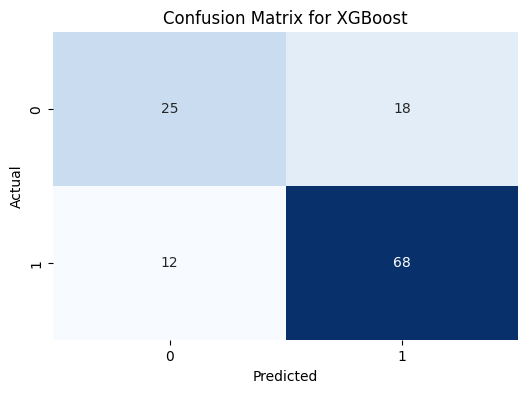

In [20]:
# Evaluate models
models = {
    'Logistic Regression': log_model,
    'Random Forest': rf_model,
    'XGBoost': xgb_model
}
for name, model in models.items():
    metrics = evaluate_model(model, X_test, y_test)
    log_info(f'{name} evaluation metrics: {metrics}')
    plot_confusion_matrix(y_test, model.predict(X_test), name)


#### Getting the best performance on random forest model with accuracy of 79%

In [21]:
# Save models
dump(log_model, os.path.join(MODEL_DIR, 'logistic_regression.sav'))
dump(rf_model, os.path.join(MODEL_DIR, 'random_forest.sav'))
dump(xgb_model, os.path.join(MODEL_DIR, 'xgb_model.sav'))
log_info('Models saved to models/ directory')

2025-09-11 08:49:49,221 - INFO - Models saved to models/ directory
